<a href="https://colab.research.google.com/github/v-keerthana/DeepLearning/blob/main/tb_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-24 07:15:53           7520  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            451  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09            703  
yasserh/song-popularity-dataset                             Song Popularity Dataset                            805KB  2022-01-07 13:18:43           1054  
vishalmane10/anime-dataset-2022     

In [2]:
! kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 97% 645M/663M [00:12<00:00, 32.6MB/s]
100% 663M/663M [00:12<00:00, 57.3MB/s]


In [3]:
import zipfile
zf = "/content/tuberculosis-tb-chest-xray-dataset.zip"
target_dir = "/content/dataset/cnn/chest-xray"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [4]:
import os
import shutil
import numpy as np
def make_dirs_for_data():
  path='/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Tuberculosis'
  os.listdir(path)[1]

  par_dir="/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database"
  path = par_dir+'/test'
  os.mkdir(path)

  path=par_dir+'/validation'
  os.mkdir(path)

  path=par_dir+'/train'
  os.mkdir(path)

  path_of_train = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train" 
  path_of_train_normal = path_of_train+'/Normal'
  path_of_train_Tb = path_of_train+'/Tb'

  os.mkdir(path_of_train_normal)
  os.mkdir(path_of_train_Tb)

  path_of_test = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test"
  path_of_test_normal = path_of_test+'/Normal'
  path_of_test_Tb = path_of_test+'/Tb'

  os.mkdir(path_of_test_normal)
  os.mkdir(path_of_test_Tb)

  path_of_val = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation"
  path_of_val_normal = path_of_val+'/Normal'
  path_of_val_Tb = path_of_val+'/Tb'

  os.mkdir(path_of_val_normal)
  os.mkdir(path_of_val_Tb)

  source ='/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Normal/'
  destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Tuberculosis/'
  destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  # source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
  # destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Noraml/'
  source ='/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
  destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:50]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
  destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:50]
  for f in allfiles:
    shutil.move(source + f, destination + f)


  source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
  destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Tb/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:50]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
  destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Tb/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:50]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  print("test-normal",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Normal')))
  print("val-normal",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Normal')))
  print("train-normal",len(os.listdir("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal")))

  print("test-Tb",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Tb')))
  print("val-Tb",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Tb')))
  print("train-Tb",len(os.listdir("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb")))

In [5]:
make_dirs_for_data()

test-normal 50
val-normal 50
train-normal 3400
test-Tb 50
val-Tb 50
train-Tb 600


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.python.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.models import Model
# from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50 
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile

In [7]:
train_normal = os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal')
train_Tb = os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb')
print(train_normal[1])
print(train_Tb[1])

Normal-3219.png
Tuberculosis-512.png


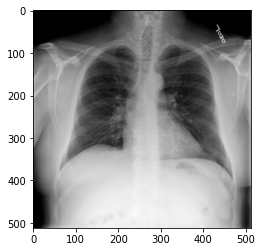

In [8]:
img = image.load_img('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/Normal-2379.png')

img = image.img_to_array(img)

img =img /255.0
plt.imshow(img)

In [11]:
def show_imgs(num_of_imgs):
  for i in range(num_of_imgs):
    tb_pic = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'+train_Tb[i]

    normal_pic = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'+train_normal[i]

    tb_pic = image.load_img(tb_pic)

    normal_pic = image.load_img(normal_pic)

    tb_pic = image.img_to_array(tb_pic)

    tb_pic =tb_pic /255.0

    normal_pic = image.img_to_array(normal_pic)

    normal_pic =normal_pic /255.0

    fig=plt.figure(figsize=(7,7))

    normal_plot = fig.add_subplot(1,2,1)
    plt.imshow(normal_pic,cmap='gray')
    plt.style.use('seaborn')
    normal_plot.set_title('Normal')
    plt.axis('off')

    Tb_plot = fig.add_subplot(1,2,2)
    plt.imshow(tb_pic,cmap='gray')
    plt.style.use('seaborn')
    normal_plot.set_title('Tb')
    plt.axis('off')

    plt.show()

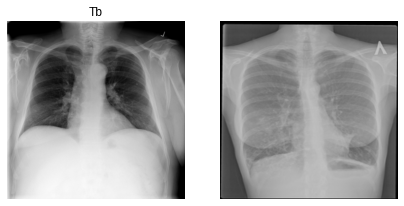

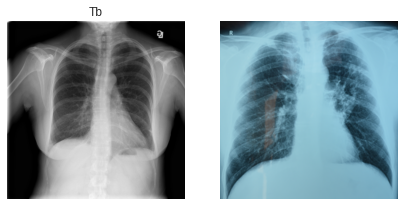

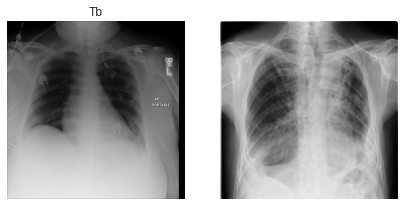

In [12]:
show_imgs(3)

In [13]:
s=32
IMAGE_SIZE = [224, 224]

In [14]:
train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )
val_gen = ImageDataGenerator(rescale=1.0/255)

In [15]:
train_generator = train_gen.flow_from_directory(
    '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)
val_generator = val_gen.flow_from_directory(
    "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 4000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [16]:
train_generator.image_shape

(224, 224, 3)

In [17]:
train_generator.class_indices

{'Normal': 0, 'Tb': 1}

In [18]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from tensorflow.keras.applications import ResNet50
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [19]:
model = Sequential()

model.add(ResNet50(include_top=False,input_tensor=None,input_shape=(224,224,3),pooling='avg',classes=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False
model.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               13

In [20]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [22]:
# Train model
batch_size=64
epochs=150
# History = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),validation_data=(x_val,y_val),
#                               epochs= epochs, steps_per_epoch=x_train.shape[0]//batch_size,verbose=1,callbacks=[red_lr]
#                              )
History = model.fit_generator(train_generator  ,validation_data=val_generator,
                              epochs= epochs, steps_per_epoch=70,verbose=1,callbacks=my_callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/150
70/70 [==============================] - ETA: 0s - loss: 0.7053 - accuracy: 0.6183
Epoch 00001: val_loss improved from inf to 0.71827, saving model to model.01-0.72.h5
70/70 [==============================] - 303s 4s/step - loss: 0.7053 - accuracy: 0.6183 - val_loss: 0.7183 - val_accuracy: 0.5000
Epoch 2/150
70/70 [==============================] - ETA: 0s - loss: 0.5320 - accuracy: 0.7728
Epoch 00002: val_loss did not improve from 0.71827
70/70 [==============================] - 297s 4s/step - loss: 0.5320 - accuracy: 0.7728 - val_loss: 1.0204 - val_accuracy: 0.5000
Epoch 3/150
70/70 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.8112
Epoch 00003: val_loss did not improve from 0.71827
70/70 [==============================] - 290s 4s/step - loss: 0.4971 - accuracy: 0.8112 - val_loss: 1.0829 - val_accuracy: 0.5000


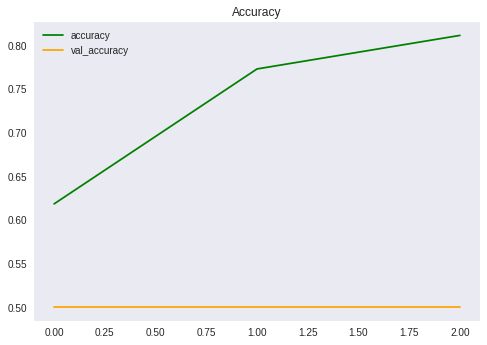

In [26]:
plt.style.use("seaborn-dark")
plt.title("Accuracy")
plt.plot(History.history['accuracy'],label="accuracy",c='green')
plt.plot(History.history['val_accuracy'],label="val_accuracy",c='orange')
plt.legend()
plt.show()

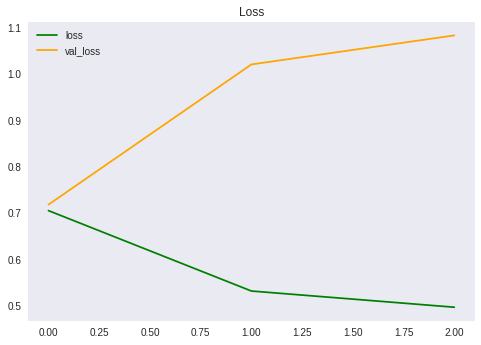

In [27]:
plt.style.use("seaborn-dark")
plt.title("Loss")
plt.plot(History.history['loss'],label="loss",c='green')
plt.plot(History.history['val_loss'],label="val_loss",c='orange')
plt.legend()
plt.show()
